In [44]:
import pandas as pd

# CSV 파일들을 읽어오기
df1 = pd.read_csv("data/따릉이/tpss_bcycl_od_statnhm_20240415.csv", encoding="euc-kr")
df2 = pd.read_csv("data/따릉이/tpss_bcycl_od_statnhm_20240416.csv", encoding="euc-kr")
df3 = pd.read_csv("data/따릉이/tpss_bcycl_od_statnhm_20240417.csv", encoding="euc-kr")
df4 = pd.read_csv("data/따릉이/tpss_bcycl_od_statnhm_20240418.csv", encoding="euc-kr")
df5 = pd.read_csv("data/따릉이/dr_20240419.csv", encoding="euc-kr")
df6 = pd.read_csv("data/따릉이/dr_20240420.csv", encoding="euc-kr")
df7 = pd.read_csv("data/따릉이/dr_20240421.csv", encoding="euc-kr")

# 세 데이터프레임을 하나로 합치기
data = pd.concat([df1, df2, df3, df4, df5, df6, df7])
# data.to_csv("data/따릉이/dr_20240419_20_21.csv")
display(data.head())

# 행정구역 데이터, 출처: https://data.seoul.go.kr/dataList/10112/S/2/datasetView.do
district = pd.read_csv("data/따릉이/행정구역(동별).csv").iloc[4:, 1:5] 
district.columns = ['구', '행정동','면적','구성비']
district.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,20240415,출발시간,0,ST-1005,신정1동_027_1,ST-1994,목5동_034_1,1,20,3838
1,20240415,출발시간,0,ST-1015,목5동_001_1,ST-2773,목5동_063_1,1,4,851
2,20240415,출발시간,0,ST-1015,목5동_001_1,ST-2844,목5동_051_1,1,13,2260
3,20240415,출발시간,0,ST-1029,녹번동_041_1,ST-459,녹번동_033_1,1,4,775
4,20240415,출발시간,0,ST-1032,불광1동_058_1,ST-2470,불광1동_053_1,1,3,792


,구,행정동,면적,구성비
4,종로구,사직동,1.23,0.20
5,종로구,삼청동,1.49,0.25
6,종로구,부암동,2.27,0.38
7,종로구,평창동,8.87,1.47
8,종로구,무악동,0.36,0.06


In [45]:
# 시작_동, 종료_동 열 추가
data['시작_동'] = data['시작_대여소명'].str.split("_").str[0]
data['종료_동'] = data['종료_대여소명'].str.split("_").str[0]

# 시작_시간대, 종료_시간대 열 추가
data['시작_시간대'] = data['기준_시간대'].apply(lambda x: int(x) // 100)  # 정수 나눗셈으로 시간대 추출
data['종료_시간대'] = data['기준_시간대'].apply(lambda x: (int(x) // 100) + 1 if x % 100 != 55 else (int(x) // 100))

# 날짜 형식으로 변환, 요일 열 추가
data['기준_날짜'] = pd.to_datetime(data['기준_날짜'], format='%Y%m%d')
data['요일'] = data['기준_날짜'].dt.dayofweek.apply(lambda x: ['월', '화', '수', '목', '금', '토', '일'][x])

data.head()


,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,시작_동,종료_동,시작_시간대,종료_시간대,요일
0,2024-04-15,출발시간,0,ST-1005,신정1동_027_1,ST-1994,목5동_034_1,1,20,3838,신정1동,목5동,0,1,월
1,2024-04-15,출발시간,0,ST-1015,목5동_001_1,ST-2773,목5동_063_1,1,4,851,목5동,목5동,0,1,월
2,2024-04-15,출발시간,0,ST-1015,목5동_001_1,ST-2844,목5동_051_1,1,13,2260,목5동,목5동,0,1,월
3,2024-04-15,출발시간,0,ST-1029,녹번동_041_1,ST-459,녹번동_033_1,1,4,775,녹번동,녹번동,0,1,월
4,2024-04-15,출발시간,0,ST-1032,불광1동_058_1,ST-2470,불광1동_053_1,1,3,792,불광1동,불광1동,0,1,월


In [46]:
# # 행정동에 따라 구, 면적 열 추가하기
data = pd.merge(data, district, left_on='시작_동', right_on='행정동', how='left')
# data = pd.merge(data, district, left_on='종료_동', right_on='행정동', how='left')
data = data.drop('행정동',axis=1)

data

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,시작_동,종료_동,시작_시간대,종료_시간대,요일,구,면적,구성비
0,2024-04-15,출발시간,0,ST-1005,신정1동_027_1,ST-1994,목5동_034_1,1,20,3838,신정1동,목5동,0,1,월,양천구,0.70,0.12
1,2024-04-15,출발시간,0,ST-1015,목5동_001_1,ST-2773,목5동_063_1,1,4,851,목5동,목5동,0,1,월,양천구,1.81,0.30
2,2024-04-15,출발시간,0,ST-1015,목5동_001_1,ST-2844,목5동_051_1,1,13,2260,목5동,목5동,0,1,월,양천구,1.81,0.30
3,2024-04-15,출발시간,0,ST-1029,녹번동_041_1,ST-459,녹번동_033_1,1,4,775,녹번동,녹번동,0,1,월,은평구,1.79,0.30
4,2024-04-15,출발시간,0,ST-1032,불광1동_058_1,ST-2470,불광1동_053_1,1,3,792,불광1동,불광1동,0,1,월,은평구,3.13,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678566,2024-04-21,도착시간,2355,ST-952,조원동_019_2,ST-727,신대방1동_045_1,1,10,892,조원동,신대방1동,23,23,일,관악구,0.67,0.11
1678567,2024-04-21,도착시간,2355,ST-971,월계3동_017_1,ST-2705,월계2동_048_2,1,10,2176,월계3동,월계2동,23,23,일,노원구,1.17,0.19
1678568,2024-04-21,도착시간,2355,ST-98,자양3동_025_2,ST-98,자양3동_025_2,1,57,6959,자양3동,자양3동,23,23,일,광진구,1.20,0.20
1678569,2024-04-21,도착시간,2355,ST-983,중곡1동_022_1,ST-394,장안1동_031_1,1,7,911,중곡1동,장안1동,23,23,일,광진구,0.62,0.10


In [43]:
data2 = data[['기준_날짜', '기준_시간대', '전체_이용_분', '전체_이용_거리', '시작_동', '종료_동', '요일', '구', '면적']]
data2 = data2[data2.전체_이용_분 * data2.전체_이용_거리 > 0]
data2

,기준_날짜,기준_시간대,전체_이용_분,전체_이용_거리,시작_동,종료_동,요일
0,2024-04-15,0,20,3838,신정1동,목5동,월
1,2024-04-15,0,4,851,목5동,목5동,월
2,2024-04-15,0,13,2260,목5동,목5동,월
3,2024-04-15,0,4,775,녹번동,녹번동,월
4,2024-04-15,0,3,792,불광1동,불광1동,월
...,...,...,...,...,...,...,...
1678566,2024-04-21,2355,10,892,조원동,신대방1동,일
1678567,2024-04-21,2355,10,2176,월계3동,월계2동,일
1678568,2024-04-21,2355,57,6959,자양3동,자양3동,일
1678569,2024-04-21,2355,7,911,중곡1동,장안1동,일


In [25]:

data_300_1 = data_300.sample(n=300, random_state=42)
# data_300.to_csv("dr_week_300.csv")

for reg in ["서초", "방배", "신림", "반포", "여의", "가양"]:
    data_300_지역 = data_300[data_300.시작_동.str[:2]==f"{reg}"]
    data_300_지역 = data_300_지역.sample(n=300, random_state=42)
    data_300_지역.to_csv(f"dr_week_300_{reg}.csv")

/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  self._figure.tight_

KeyboardInterrupt: 

/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/IPython/core/e

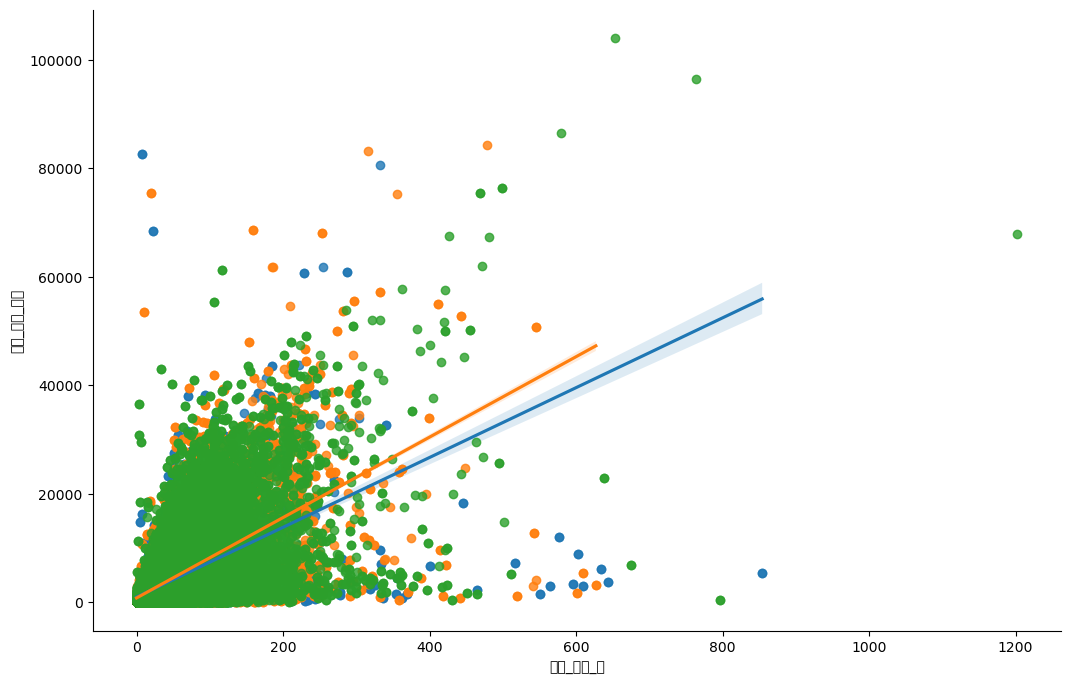

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# lmplot을 사용한 산점도 및 회귀선 그리기
sns.lmplot(data=data, x='전체_이용_분', y='전체_이용_거리', hue='요일', aspect=1.5, height=7)

plt.title('전체 이용 분 대비 전체 이용 거리의 회귀선 분석')
plt.xlabel('전체 이용 분')
plt.ylabel('전체 이용 거리')
plt.show()

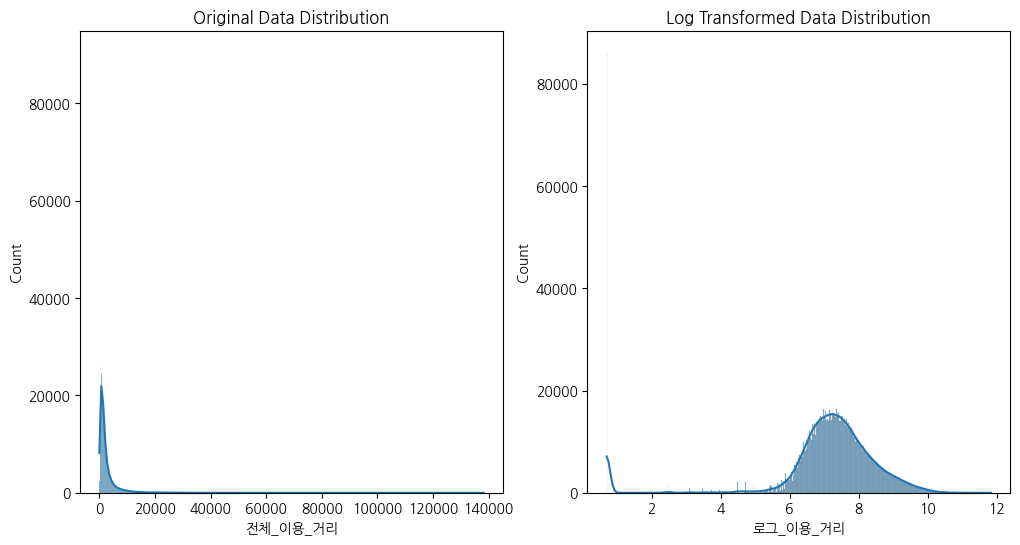

Mean Squared Error: 1413205.1439554566


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# '전체_이용_거리' 로그 변환
data['로그_이용_거리'] = np.log1p(data['전체_이용_거리']+1)

# 데이터 분포 확인
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['전체_이용_거리'], kde=True)
plt.title('Original Data Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['로그_이용_거리'], kde=True)
plt.title('Log Transformed Data Distribution')
plt.show()

# 모델 생성 및 평가
X = data[['시작_시간대']]  # 예시 독립 변수
y = data['로그_이용_거리']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# 예측 결과의 오류 계산
mse = mean_squared_error(y_test, np.exp(predictions))
print("Mean Squared Error:", mse)

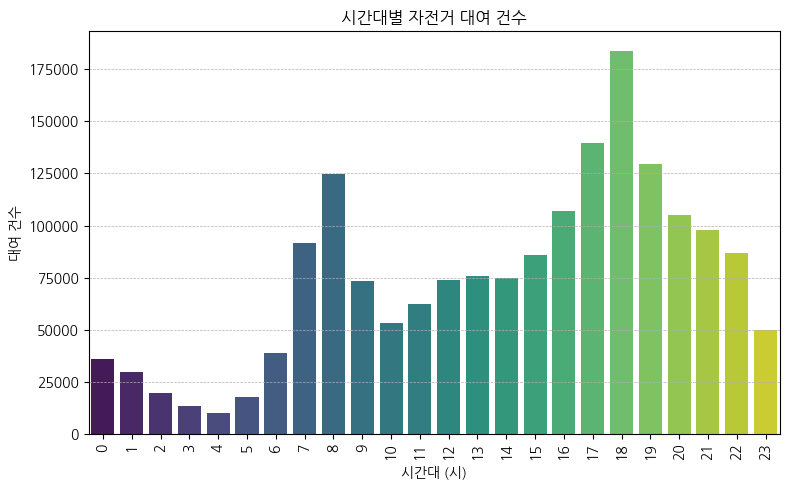

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 질문 1: 어느 시간대에 자전거 대여가 가장 활발할까?

# '시작_시간대' 별로 데이터 집계
time_agg = data.groupby('시작_시간대')['전체_건수'].sum().reset_index()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='시작_시간대', y='전체_건수', data=time_agg, palette='viridis')
plt.title('시간대별 자전거 대여 건수')
plt.xlabel('시간대 (시)')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)  # x축 라벨을 회전하여 더 잘 보이게 함
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


(0.0, 200000.0)

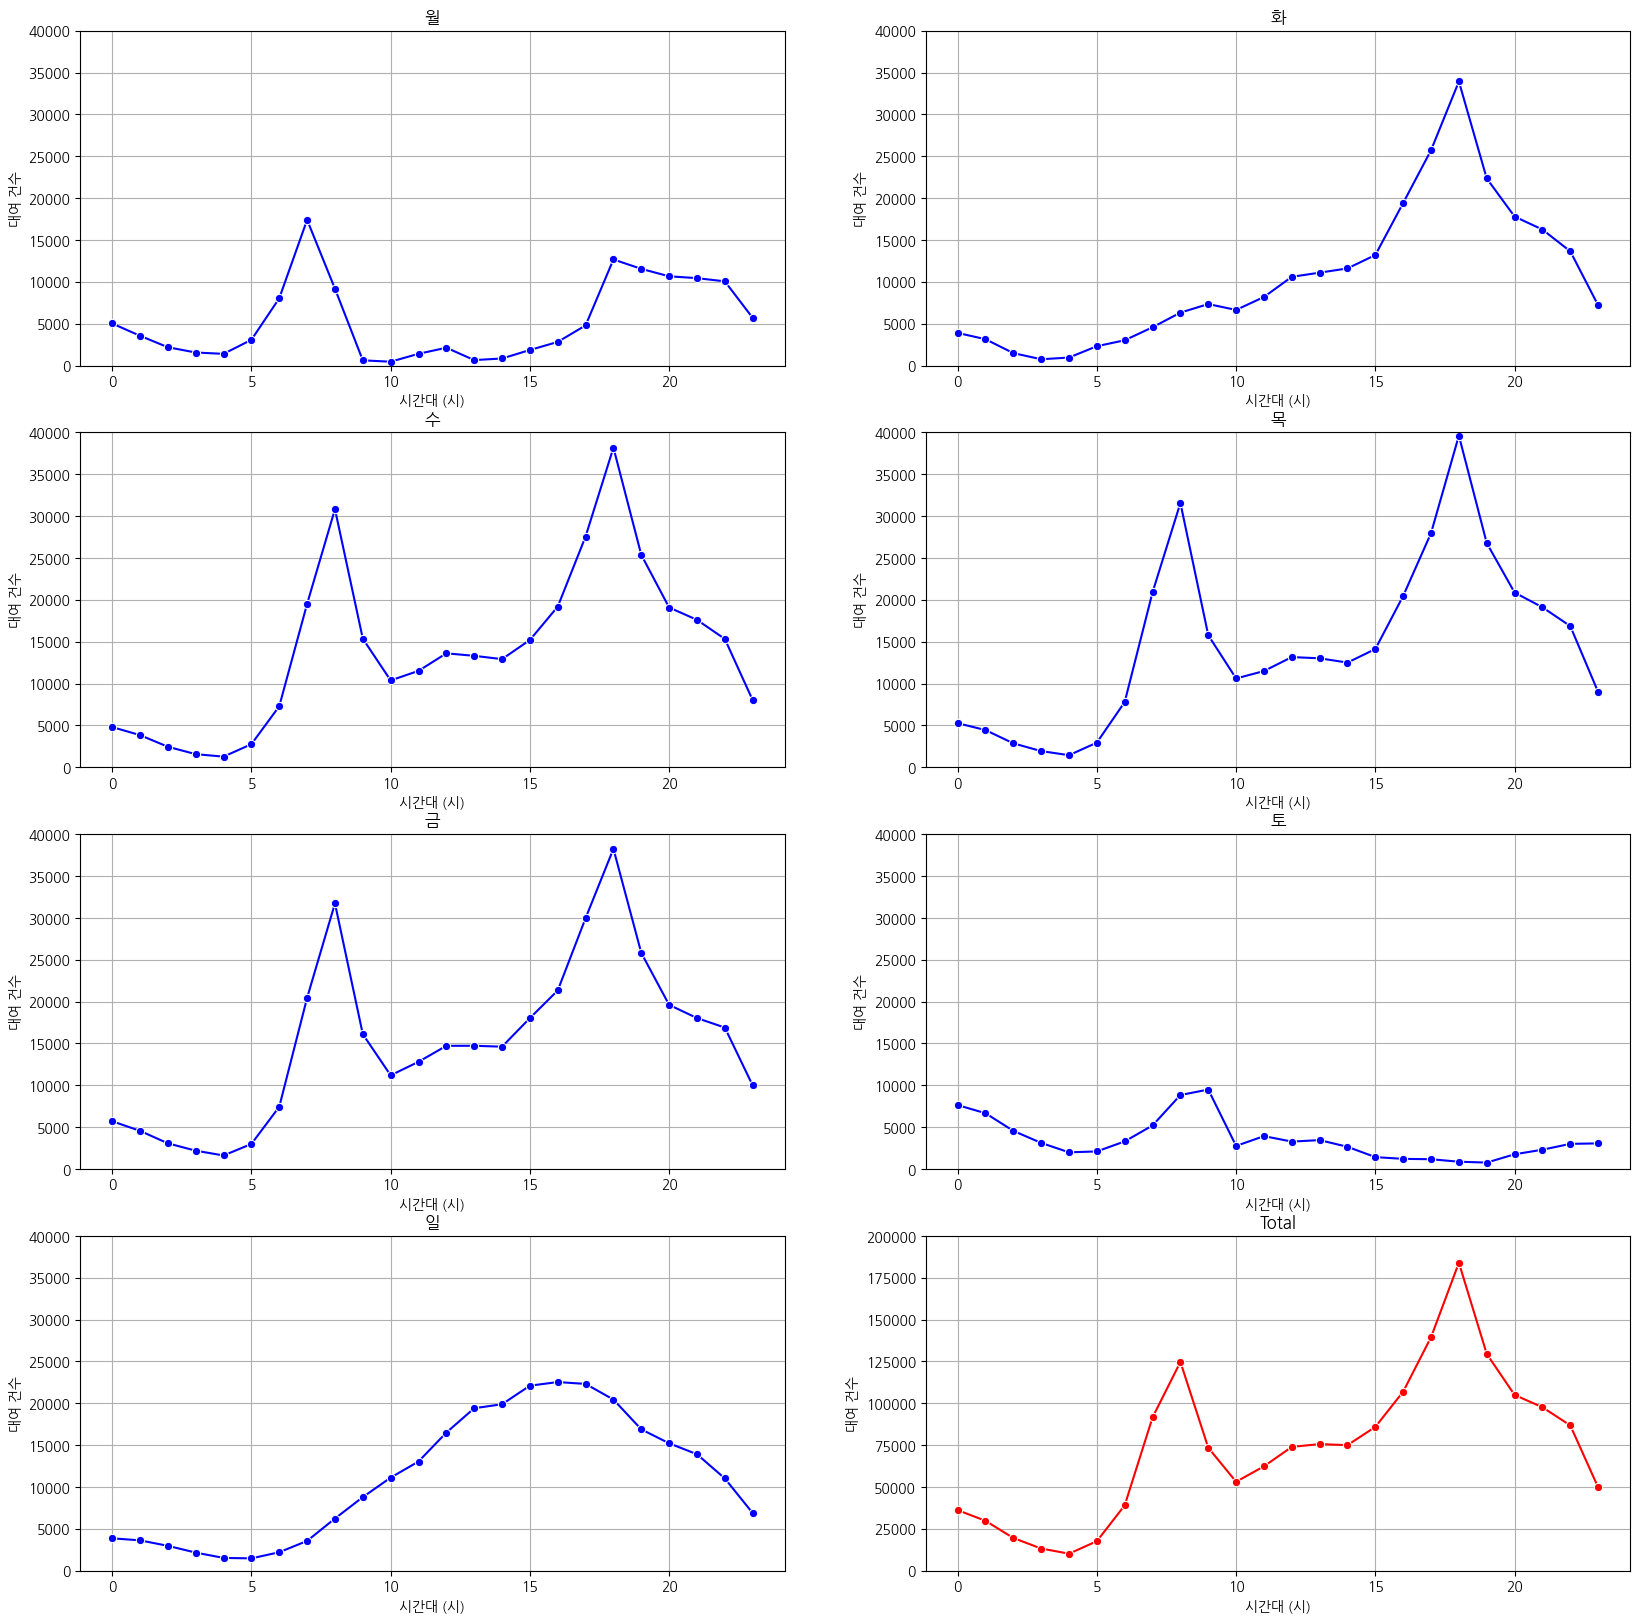

In [62]:

# 서브플롯 생성
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20)) 
daily_data = data.groupby(['요일', '시작_시간대'])['전체_건수'].sum().reset_index()

# 요일 순서 지정
weekdays = ['월', '화', '수', '목', '금', '토', '일']

# 각 요일별 그래프 그리기
for i, day in enumerate(weekdays):
    ax = axes[i//2, i%2]
    subset = daily_data[daily_data['요일'] == day]
    sns.lineplot(data=subset, x='시작_시간대', y='전체_건수', ax=ax, marker='o', color='b')
    ax.set_title(f'{day}')
    ax.set_xlabel('시간대 (시)')
    ax.set_ylabel('대여 건수')
    ax.grid(True)
    ax.set_ylim([0, 40000])  # 통일된 y축 범위 설정

# 전체 데이터 그래프
ax = axes[3, 1]  # 마지막 그리드 위치 수정
total_data = data.groupby('시작_시간대')['전체_건수'].sum().reset_index()
sns.lineplot(data=total_data, x='시작_시간대', y='전체_건수', ax=ax, marker='o', color='r')
ax.set_title('Total')
ax.set_xlabel('시간대 (시)')
ax.set_ylabel('대여 건수')
ax.grid(True)
ax.set_ylim([0, 200000])  # 다른 y축 범위 설정

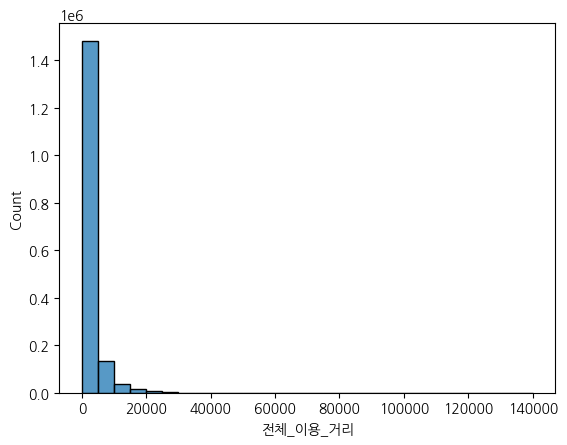

/Users/hwangsubin/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


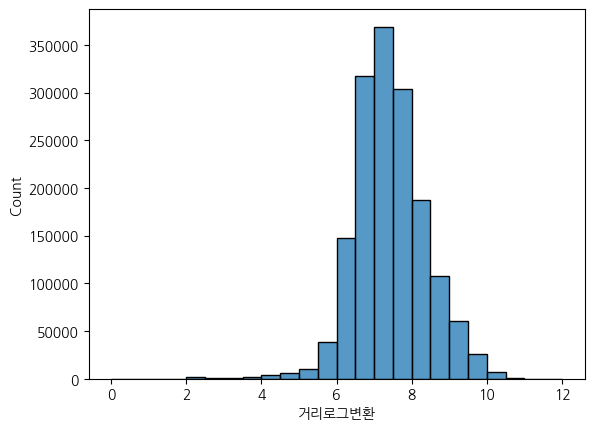

In [68]:
import numpy as np
sns.histplot(data = data, x="전체_이용_거리", binwidth = 5000)
plt.show()
data['거리로그변환'] = np.log(data["전체_이용_거리"])
sns.histplot(data = data, x="거리로그변환", binwidth=0.5)
plt.show()


<Axes: xlabel='요일', ylabel='count'>

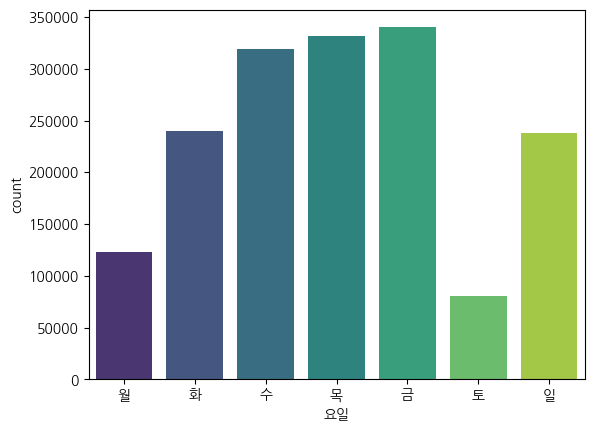

In [16]:
sns.countplot(data = data, x = "요일", palette='viridis')

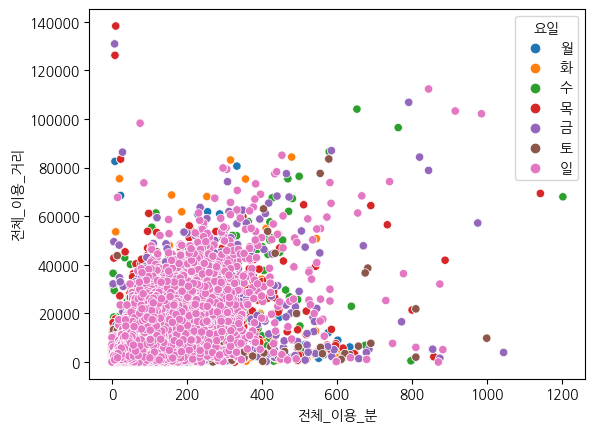

In [49]:

sns.scatterplot(data = data, x = "전체_이용_분", y = '전체_이용_거리', hue = "요일")
plt.show()

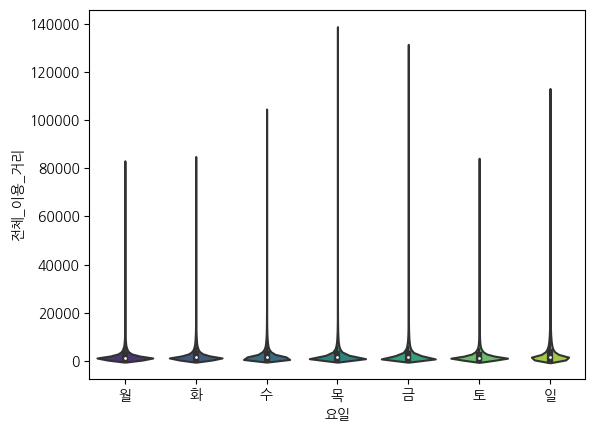

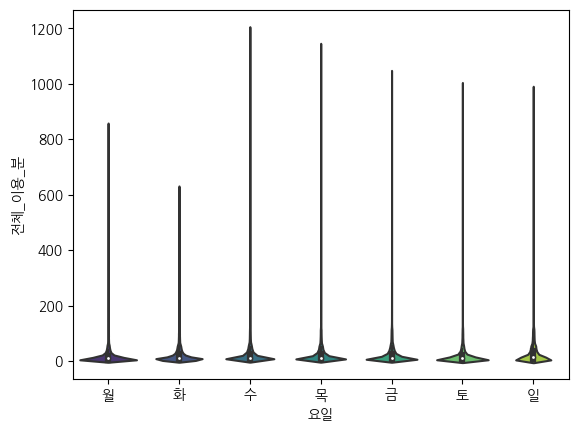

In [47]:
sns.violinplot(data = data, x = "요일", y = '전체_이용_거리', palette='viridis')
plt.show()

sns.violinplot(data = data, x = "요일", y = '전체_이용_분', palette='viridis')
plt.show()

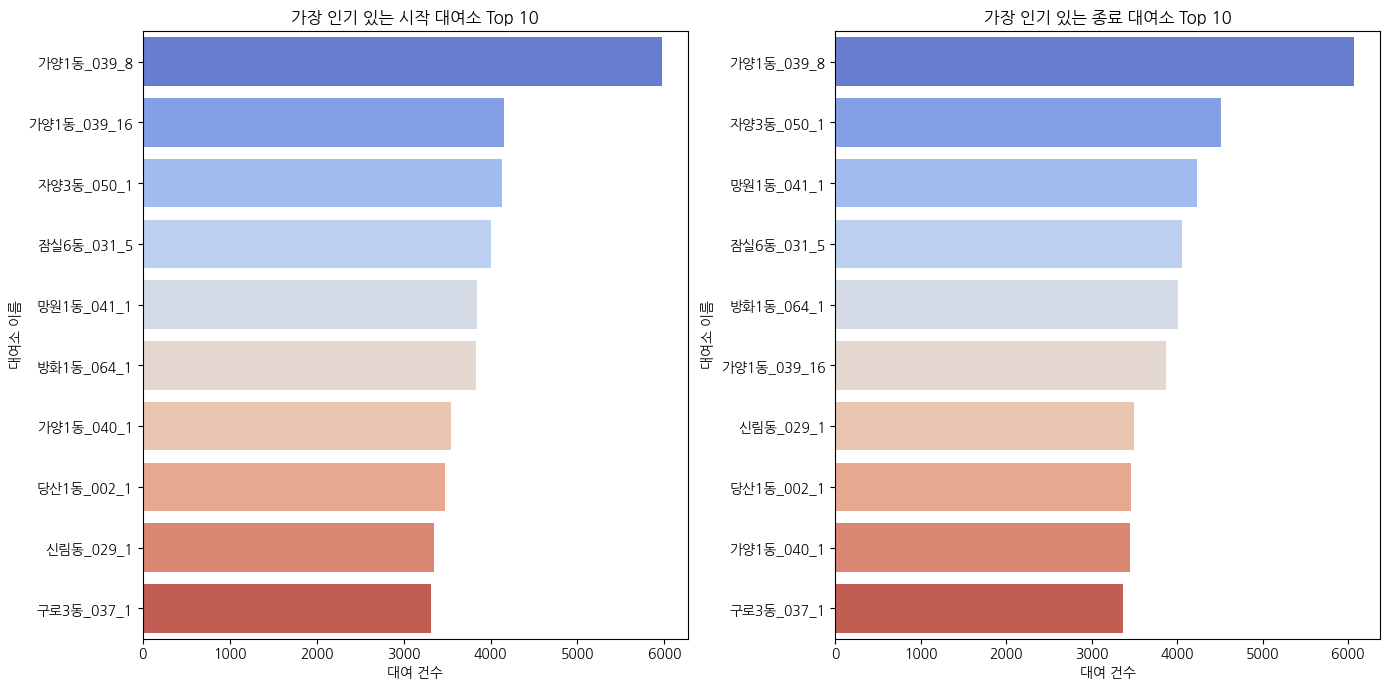

In [17]:
# 시작 대여소와 종료 대여소별로 데이터 집계
start_station_agg = data['시작_대여소명'].value_counts().nlargest(10)  # 가장 많은 대여가 시작된 상위 10개 대여소
end_station_agg = data['종료_대여소명'].value_counts().nlargest(10)  # 가장 많은 대여가 종료된 상위 10개 대여소

# 시각화
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x=start_station_agg.values, y=start_station_agg.index, palette='coolwarm')
plt.title('가장 인기 있는 시작 대여소 Top 10')
plt.xlabel('대여 건수')
plt.ylabel('대여소 이름')

plt.subplot(1, 2, 2)
sns.barplot(x=end_station_agg.values, y=end_station_agg.index, palette='coolwarm')
plt.title('가장 인기 있는 종료 대여소 Top 10')
plt.xlabel('대여 건수')
plt.ylabel('대여소 이름')

plt.tight_layout()
plt.show()

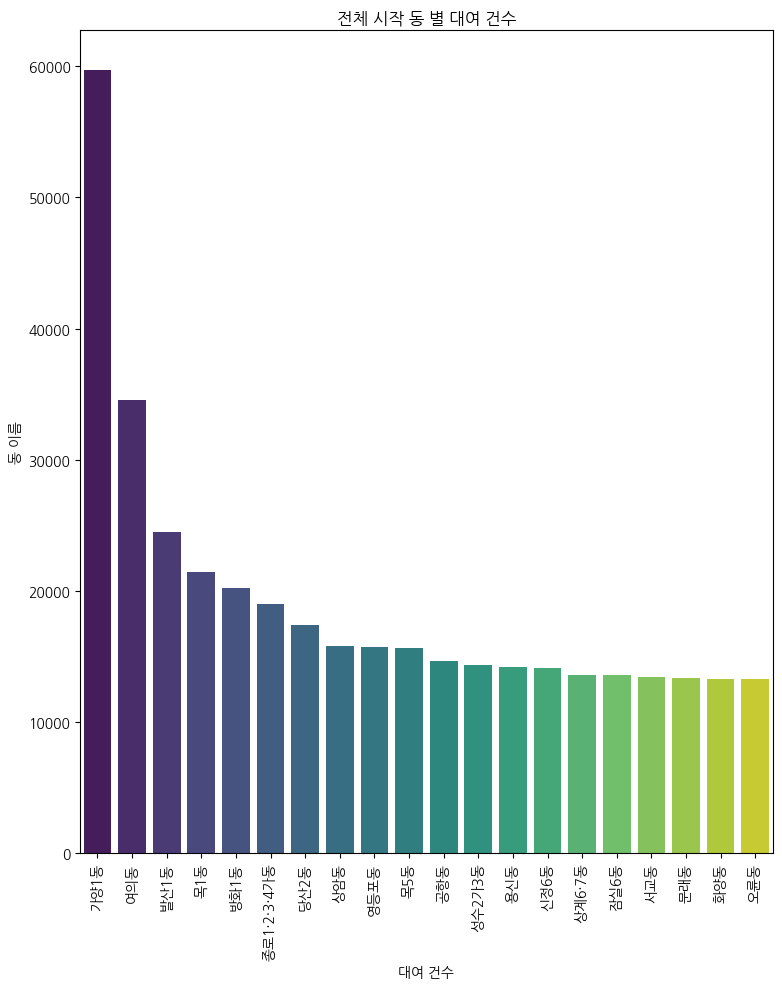

In [18]:
# 시작 및 종료 동 별로 데이터 집계
start_dong_agg = data['시작_동'].value_counts().sort_values(ascending=False)  # 모든 시작 동 집계

# 시각화
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.barplot(y=start_dong_agg.values[:20], x=start_dong_agg.index[:20], palette='viridis')
plt.title('전체 시작 동 별 대여 건수')
plt.xlabel('대여 건수')
plt.xticks(rotation = 90)
plt.ylabel('동 이름')

plt.tight_layout()
plt.show()

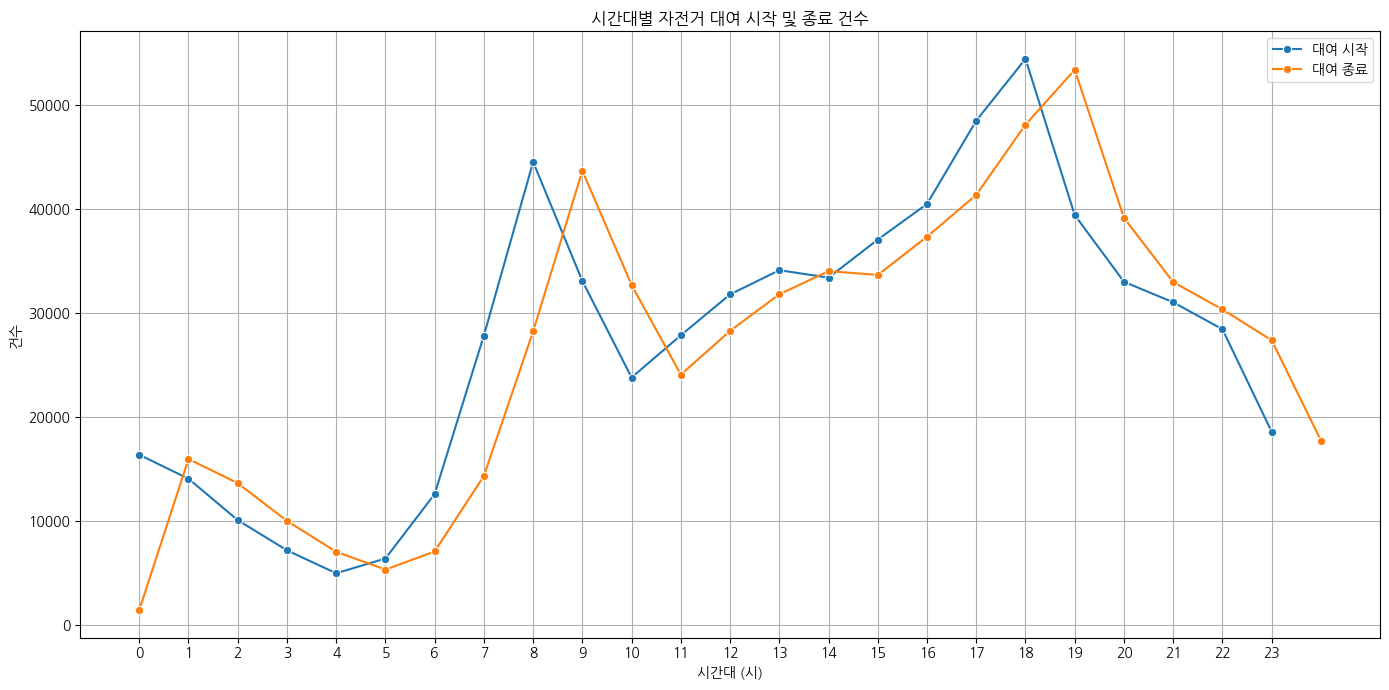

In [6]:

# 데이터에서 '시작_시간대'와 '종료_시간대' 추출
data['시작_시간대'] = data['기준_시간대'].apply(lambda x: int(x) // 100)  # 정수 나눗셈으로 시간대 추출
data['종료_시간대'] = data['기준_시간대'].apply(lambda x: (int(x) // 100) + 1 if x % 100 != 55 else (int(x) // 100))

# 시작 시간대와 종료 시간대별로 데이터 집계
start_time_agg = data['시작_시간대'].value_counts().sort_index()
end_time_agg = data['종료_시간대'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(x=start_time_agg.index, y=start_time_agg.values, label='대여 시작', marker='o')
sns.lineplot(x=end_time_agg.index, y=end_time_agg.values, label='대여 종료', marker='o')
plt.title('시간대별 자전거 대여 시작 및 종료 건수')
plt.xlabel('시간대 (시)')
plt.ylabel('건수')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))  # 시간대는 0시부터 23시까지
plt.tight_layout()
plt.show()

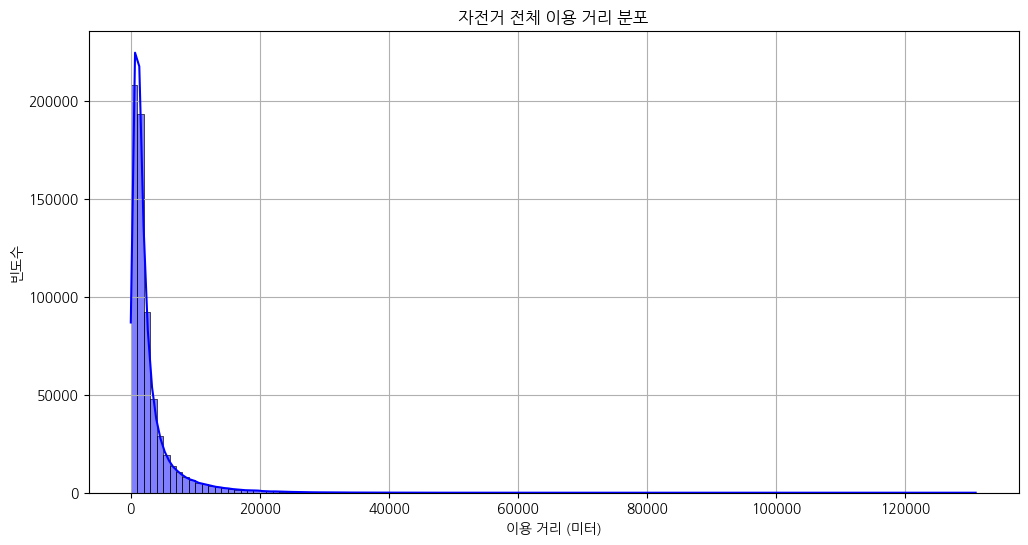

In [10]:

# 히스토그램 그리기
plt.figure(figsize=(12, 6))
sns.histplot(data['전체_이용_거리'], binwidth = 1000, kde=True, color='blue')
plt.title('자전거 전체 이용 거리 분포')
plt.xlabel('이용 거리 (미터)')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,시작_동,시작_시간대,종료_시간대,요일
0,2024-04-19,출발시간,0,ST-1000,신정7동_003_1,ST-1000,신정7동_003_1,1,0,0,신정7동,0,1,금
1,2024-04-19,출발시간,0,ST-1000,신정7동_003_1,ST-3047,신정1동_001_1,1,8,1632,신정7동,0,1,금
2,2024-04-19,출발시간,0,ST-1011,신월1동_012_1,ST-3276,화곡3동_002_1,1,5,719,신월1동,0,1,금
3,2024-04-19,출발시간,0,ST-1018,목5동_080_1,ST-997,목4동_021_1,1,4,630,목5동,0,1,금
4,2024-04-19,출발시간,0,ST-1024,진관동_108_1,ST-1329,진관동_031_1,1,3,520,진관동,0,1,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658591,2024-04-21,도착시간,2355,ST-952,조원동_019_2,ST-727,신대방1동_045_1,1,10,892,조원동,23,23,일
658592,2024-04-21,도착시간,2355,ST-971,월계3동_017_1,ST-2705,월계2동_048_2,1,10,2176,월계3동,23,23,일
658593,2024-04-21,도착시간,2355,ST-98,자양3동_025_2,ST-98,자양3동_025_2,1,57,6959,자양3동,23,23,일
658594,2024-04-21,도착시간,2355,ST-983,중곡1동_022_1,ST-394,장안1동_031_1,1,7,911,중곡1동,23,23,일


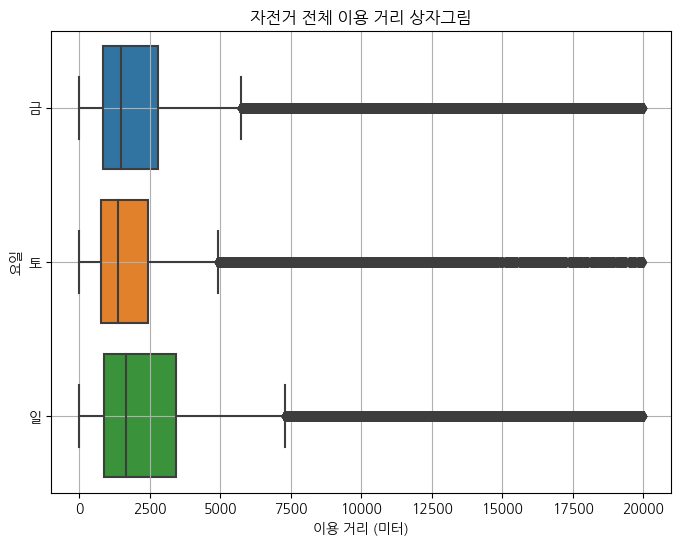

In [21]:
# 상자그림 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(data = data[data["전체_이용_거리"]<20000], x='전체_이용_거리', y='요일')
plt.title('자전거 전체 이용 거리 상자그림')
plt.xlabel('이용 거리 (미터)')
plt.grid(True)
plt.show()

In [1]:
data

NameError: name 'data' is not defined